In [1]:
# example with dowhy

# http://dagitty.net/dags.html#

In [2]:
import pandas as pd 
import numpy as np

In [ ]:
train = pd.read_csv("../datasource/titanic/train.csv")
test = pd.read_csv("../datasource/titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# !pip install dowhy


# Dowhy example

## Data

In [ ]:
from dowhy import CausalModel
import dowhy.datasets

# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

In [ ]:
data.keys()

dict_keys(['df', 'treatment_name', 'outcome_name', 'common_causes_names', 'instrument_names', 'effect_modifier_names', 'frontdoor_variables_names', 'dot_graph', 'gml_graph', 'ate'])

In [ ]:
# z, instrument variable, w, common cause,  x, treatment,  y, outcome
# w-> v,  w-> y  common cause
# v0, v1, instrument variable


In [107]:
df = data["df"]


In [ ]:
data['df']

,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,0.0,0.794947,1.302235,0.902656,-0.187252,0.119561,2.635452,True,30.971372
1,0.0,0.384229,1.425780,1.132198,0.664179,0.690577,-0.408762,True,17.895436
2,0.0,0.373958,1.207925,2.852794,0.231206,2.305027,-0.389038,True,28.482033
3,0.0,0.964730,1.700982,1.721775,-0.518064,1.073008,0.982963,True,29.001825
4,0.0,0.791835,0.908818,0.617467,-0.695511,1.063764,0.999182,True,23.844304
...,...,...,...,...,...,...,...,...,...
9995,0.0,0.795052,2.093495,-0.501801,-2.004139,1.978337,0.284918,True,23.592501
9996,0.0,0.641661,-0.795294,0.298515,-1.156829,2.510678,1.968943,True,29.348462
9997,0.0,0.264608,0.562855,1.570828,-1.355391,1.594107,-0.123583,True,21.155255
9998,0.0,0.993892,-0.479878,1.380016,0.398963,1.131600,-0.296746,True,15.508882


In [114]:
df

,Z0,Z1,W0,W1,W2,W3,W4,v0,y,propensity_score,...,ips_normalized_weight,tips_normalized_weight,cips_normalized_weight,ips_stabilized_weight,tips_stabilized_weight,cips_stabilized_weight,d_y,dbar_y,strata,dbar
0,0.0,0.794947,1.302235,0.902656,-0.187252,0.119561,2.635452,True,30.971372,0.95,...,0.000101,0.000106,0.000053,0.993263,0.9436,0.049663,30.971372,0.0,2.0,0
1,0.0,0.384229,1.425780,1.132198,0.664179,0.690577,-0.408762,True,17.895436,0.95,...,0.000101,0.000106,0.000053,0.993263,0.9436,0.049663,17.895436,0.0,2.0,0
2,0.0,0.373958,1.207925,2.852794,0.231206,2.305027,-0.389038,True,28.482033,0.95,...,0.000101,0.000106,0.000053,0.993263,0.9436,0.049663,28.482033,0.0,2.0,0
3,0.0,0.964730,1.700982,1.721775,-0.518064,1.073008,0.982963,True,29.001825,0.95,...,0.000101,0.000106,0.000053,0.993263,0.9436,0.049663,29.001825,0.0,2.0,0
4,0.0,0.791835,0.908818,0.617467,-0.695511,1.063764,0.999182,True,23.844304,0.95,...,0.000101,0.000106,0.000053,0.993263,0.9436,0.049663,23.844304,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.795052,2.093495,-0.501801,-2.004139,1.978337,0.284918,True,23.592501,0.95,...,0.000101,0.000106,0.000053,0.993263,0.9436,0.049663,23.592501,0.0,2.0,0
9996,0.0,0.641661,-0.795294,0.298515,-1.156829,2.510678,1.968943,True,29.348462,0.95,...,0.000101,0.000106,0.000053,0.993263,0.9436,0.049663,29.348462,0.0,2.0,0
9997,0.0,0.264608,0.562855,1.570828,-1.355391,1.594107,-0.123583,True,21.155255,0.95,...,0.000101,0.000106,0.000053,0.993263,0.9436,0.049663,21.155255,0.0,2.0,0
9998,0.0,0.993892,-0.479878,1.380016,0.398963,1.131600,-0.296746,True,15.508882,0.95,...,0.000101,0.000106,0.000053,0.993263,0.9436,0.049663,15.508882,0.0,2.0,0


In [113]:
df.describe()

,Z0,Z1,W0,W1,W2,W3,W4,y,propensity_score,ips_weight,...,ips_normalized_weight,tips_normalized_weight,cips_normalized_weight,ips_stabilized_weight,tips_stabilized_weight,cips_stabilized_weight,d_y,dbar_y,strata,dbar
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.112600,0.502518,0.819487,0.665243,-0.498084,0.988491,0.258582,18.840655,0.907499,1.312688,...,0.000200,0.000200,0.000200,0.998589,0.902461,0.096128,18.971082,-0.130427,1.657600,0.056400
std,0.316119,0.289064,1.001231,0.996739,0.998995,1.001466,0.999922,9.046334,0.140824,1.585773,...,0.000606,0.000704,0.000590,0.458127,0.182727,0.416200,8.646468,1.457940,0.747274,0.230704
min,0.000000,0.000103,-2.870893,-2.828839,-4.567165,-2.905674,-3.619497,-20.497031,0.050000,1.052632,...,0.000101,0.000025,0.000053,0.059368,0.002968,0.049663,-5.906205,-20.497031,0.000000,0.000000
25%,0.000000,0.252344,0.147625,-0.001729,-1.171950,0.314530,-0.421940,13.824185,0.950000,1.052632,...,0.000101,0.000106,0.000053,0.993263,0.943600,0.049663,13.808239,0.000000,2.000000,0.000000
50%,0.000000,0.500741,0.821561,0.657749,-0.496774,0.986524,0.245849,19.241062,0.950000,1.052632,...,0.000101,0.000106,0.000053,0.993263,0.943600,0.049663,19.241062,0.000000,2.000000,0.000000
75%,0.000000,0.755313,1.498884,1.340213,0.182796,1.654042,0.939148,24.786200,0.950000,1.052632,...,0.000101,0.000106,0.000053,0.993263,0.943600,0.049663,24.786200,0.000000,2.000000,0.000000
max,1.000000,0.999797,4.608577,4.426566,3.694783,5.851404,4.274402,47.878376,0.950000,20.000000,...,0.007391,0.008871,0.019289,18.872000,1.071600,17.928400,47.878376,15.153409,2.000000,1.000000


In [ ]:
# !pip install plotly

In [ ]:
# !pip install seaborn

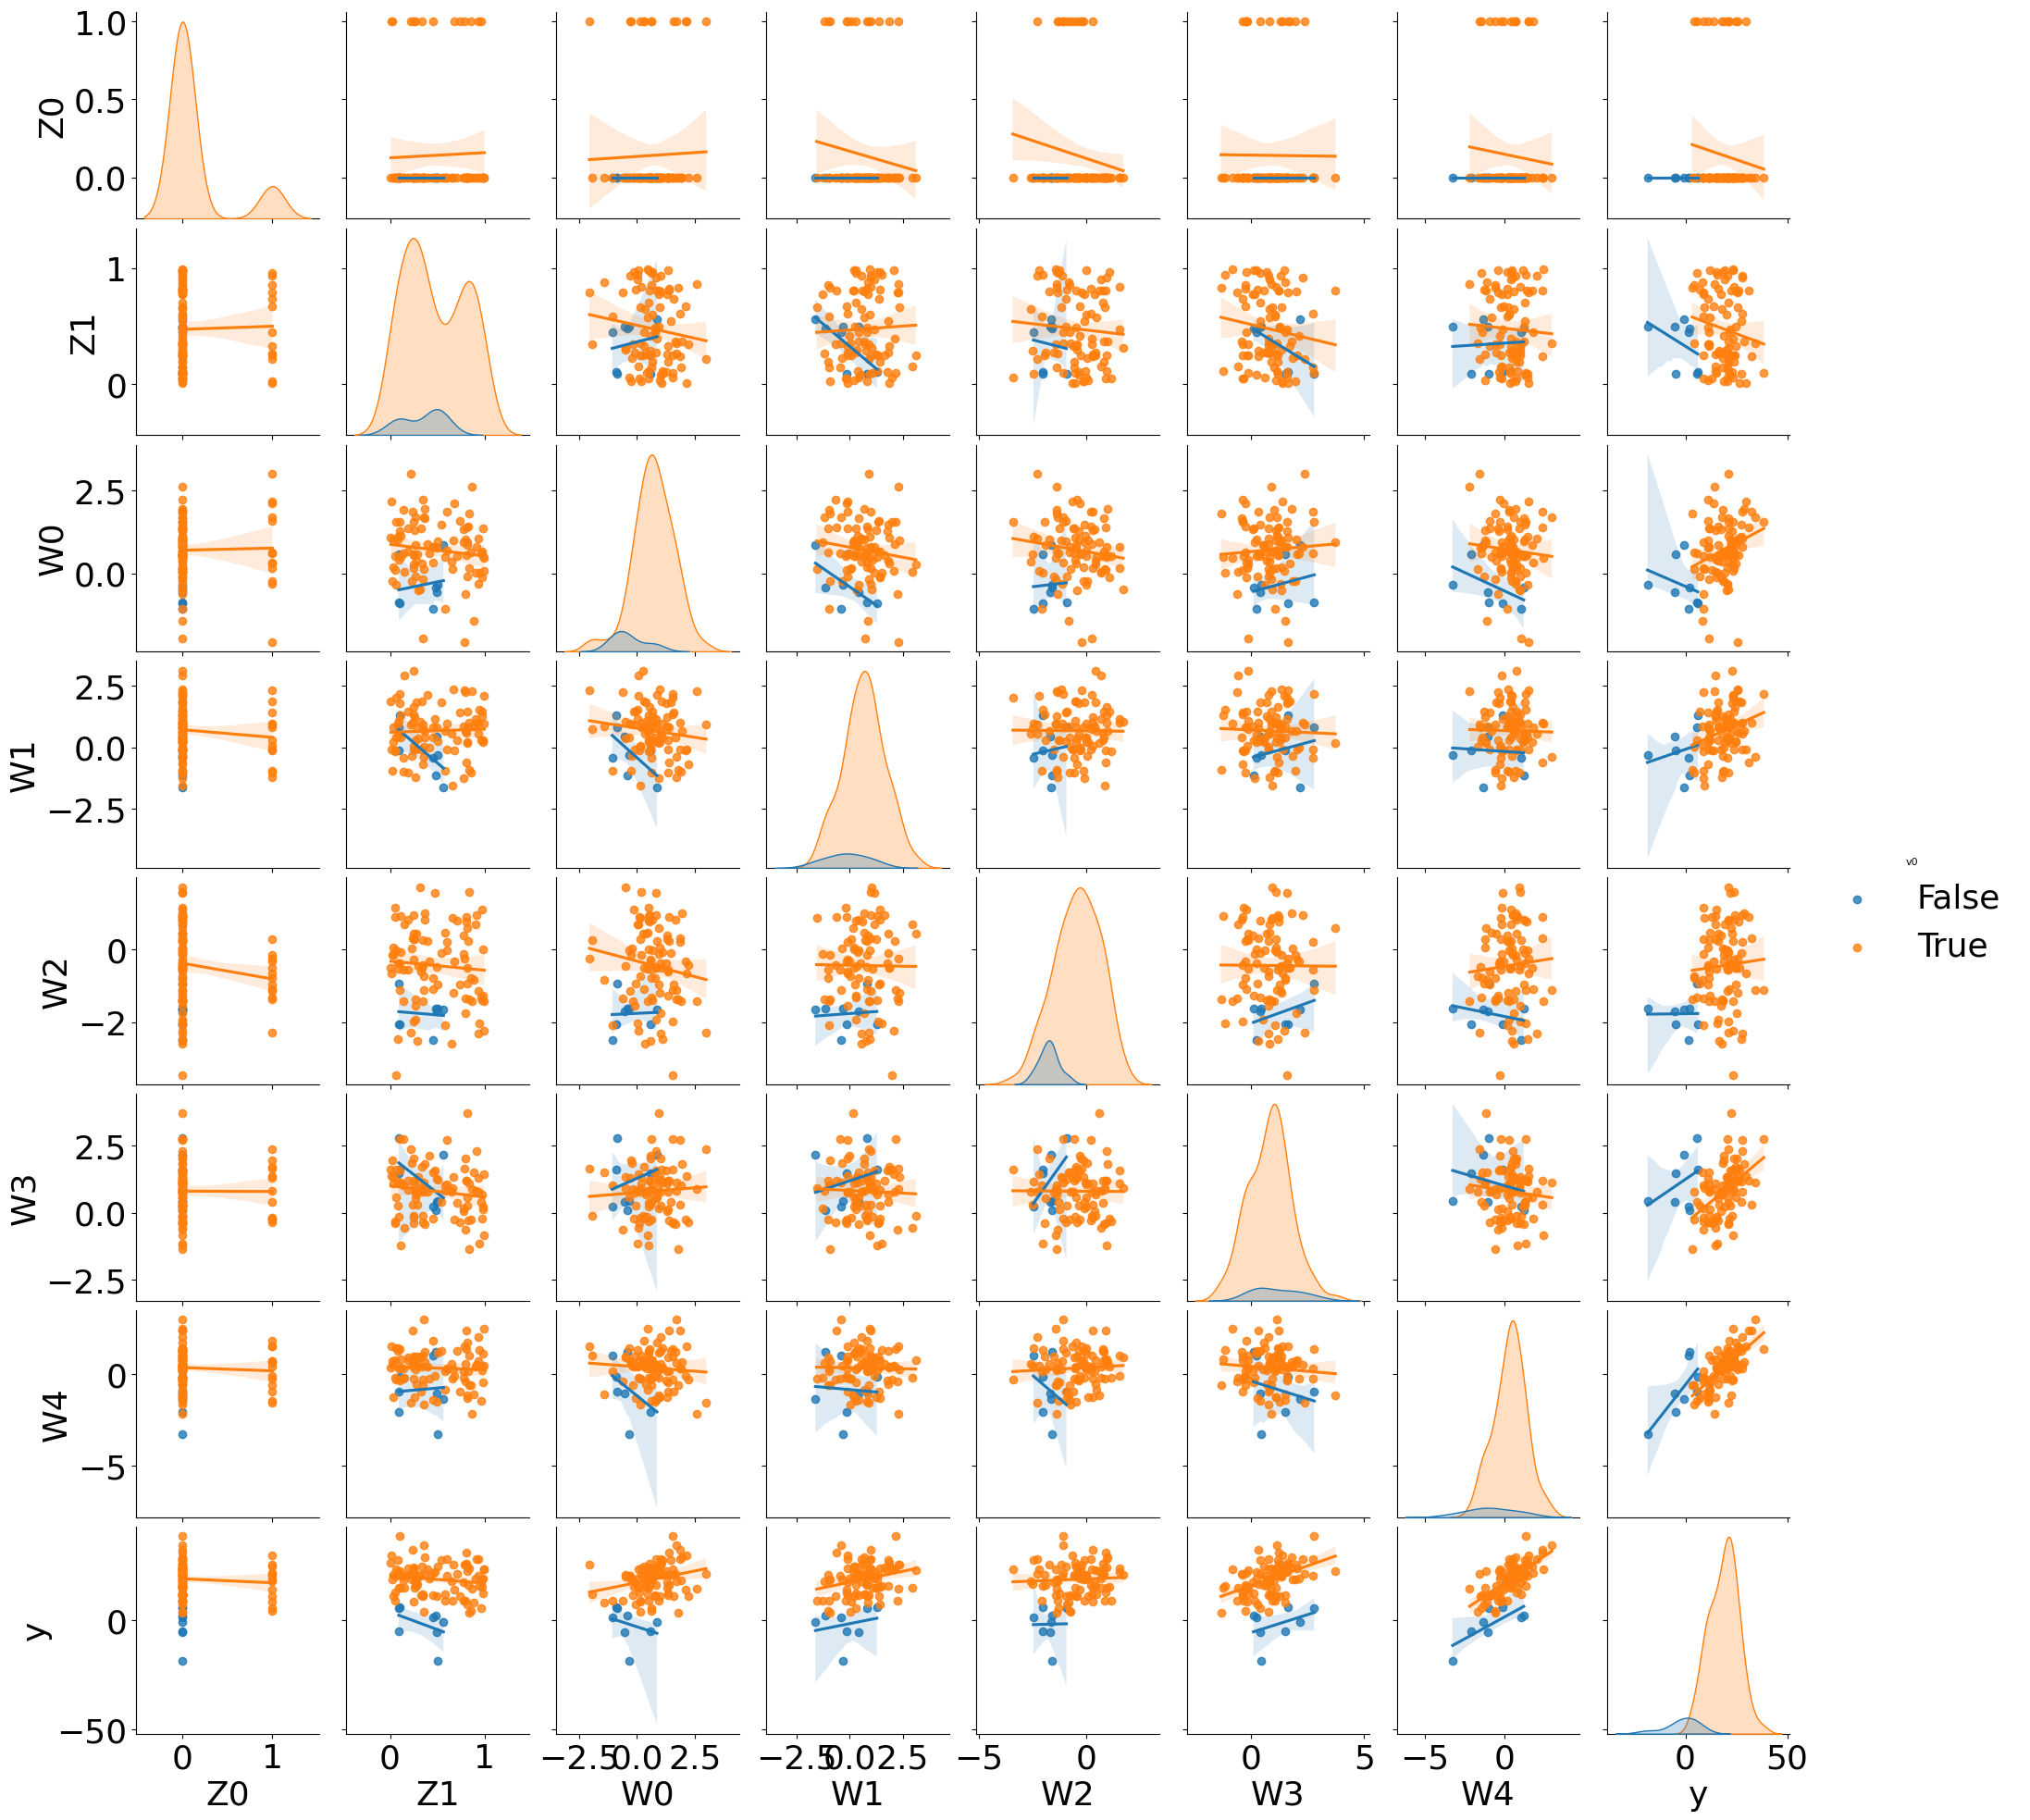

In [86]:
# Traditional way  visualizing the data

import seaborn as sns
df_p = data['df'].sample(100)
sns.pairplot(df_p,hue="v0", kind="reg")

In [87]:
data['gml_graph']

'graph[directed 1node[ id "y" label "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "Z0" label "Z0"] node[ id "Z1" label "Z1"]node[ id "v0" label "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W4" target "v0"]edge[ source "Z0" target "v0"] edge[ source "Z1" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"] edge[ source "W2" target "y"] edge[ source "W3" target "y"] edge[ source "W4" target "y"]]'

In [88]:
data['dot_graph']

'digraph {v0->y;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;Z0-> v0; Z1-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;}'

In [ ]:
# show the causal graph with graphviz
## show graph not working with graphviz


In [90]:
# from graphviz import Source
# graph = Source(gml) 
# graph 

In [91]:

# import graphviz
# gml = data['gml_graph']
# graph = graphviz.Source(gml)
# graph.view()

# Interface 1 (recommended): Input causal graph


## Model

In [99]:
# I. Create a causal model from the data and given graph.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect()


In [100]:
model.view_model()

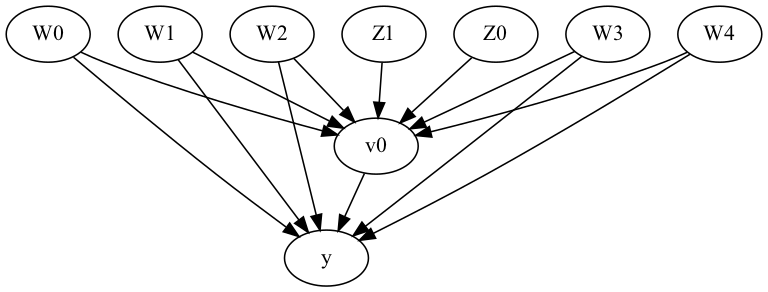

In [101]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

## Identify the causal effect

In [102]:
# III. Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")



estimate2 = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_weighting")


estimate3 = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification")



propensity_score_matching 和 propensity_score_weighting 都是基于propensity score的方法,主要用于观察性研究中处理选择偏差。两者的主要区别是:
propensity_score_matching:
- 是一个匹配方法。它通过propensity score将治疗组和对照组中的个体进行匹配,从而获得一个平衡的样本。
- 匹配后,两组之间的平衡度得到提高,从而减轻选择偏差。
- 但是匹配过程中会删除一些样本,可能导致效率 loss。

propensity_score_weighting:
- 是一个加权方法。它使用propensity score作为权重,给予观察值不同的权重,从而降低选择偏差。
- 由于使用了所有样本,所以效率 loss 小。但是平衡度可能不如匹配法好。
- 必须在连接模型中使用权重,普通的线性回归等模型无法直接使用。
所以综上,这两种方法的选择主要根据研究实际情况而定:
- 如果样本量很大,考虑使用propensity_score_weighting,以免丢失太多信息。
- 如果要获得更高的平衡度,考虑使用propensity_score_matching。
- 也可以两者结合,先匹配得到部分平衡,再在匹配后的样本上使用加权,以进一步提高平衡度。

propensity_score_stratification 是一种在观察性研究中用于平衡不同治疗组之间的协变量分布的方法。
具体来说,它涉及:
1. 使用Logistic回归模型或 autres 方法来评估每个研究对象选择某一干预措施的倾向评分(propensity score)。倾向评分表示的是研究对象基于其协变量受某一特定治疗的概率。
2. 根据倾向评分将研究对象划分为不同的层(strata)。通常使用5层划分法,但具体层数可以根据研究设定灵活选择。
3. 在每个层内比较不同治疗组的结果。这可以帮助在一定程度上消除不同治疗组之间的协变量分布差异,从而减少选择偏差。
4. 最后,可以在所有层的结果上做汇总,得出不同治疗措施的整体效果比较。
所以,propensity_score_stratification 是一种通过建立协变量平衡的层来缓解选择偏差问题的办法。它在无随机对照实验情况下,可以产生更可信的因果推断。
总的来说,这个方法的关键是:在无法随机分配不同治疗时,通过统计方法构建出尽量平衡的组,以产生可靠的比较。

In [103]:
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W0,W4,W1,W3,W2])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W4,W1,W3,W2,U) = P(y|v0,W0,W4,W1,W3,W2)

## Realized estimand
b: y~v0+W0+W4+W1+W3+W2
Target units: ate

## Estimate
Mean value: 15.200299066705632



In [104]:
print(estimate2)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W0,W4,W1,W3,W2])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W4,W1,W3,W2,U) = P(y|v0,W0,W4,W1,W3,W2)

## Realized estimand
b: y~v0+W0+W4+W1+W3+W2
Target units: ate

## Estimate
Mean value: 18.391820368081543



In [105]:
print(estimate3)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W0,W4,W1,W3,W2])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W4,W1,W3,W2,U) = P(y|v0,W0,W4,W1,W3,W2)

## Realized estimand
b: y~v0+W0+W4+W1+W3+W2
Target units: ate

## Estimate
Mean value: 16.099096307506183



# Interface 2: specify common causes and instruments directly

In [108]:
# Without graph                                       
model= CausalModel(                             
        data=df,                                      
        treatment=data["treatment_name"],             
        outcome=data["outcome_name"],                 
        common_causes=data["common_causes_names"],
        effect_modifiers=data["effect_modifier_names"])    

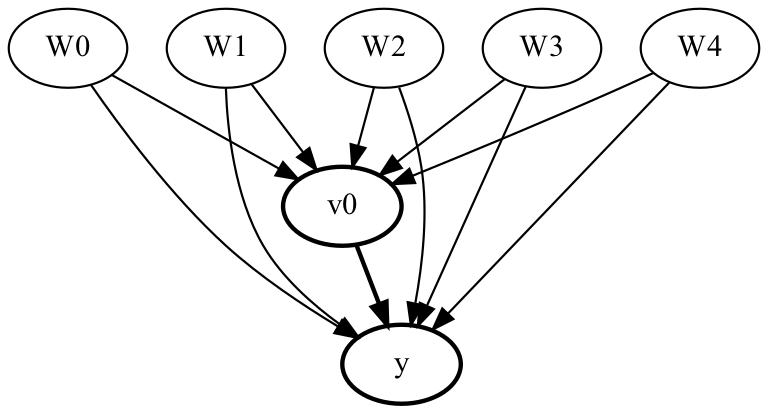

In [109]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [111]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)                         


In [112]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification")         
print(estimate)
print("Causal Estimate is " + str(estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W0,W4,W1,W3,W2])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W4,W1,W3,W2,U) = P(y|v0,W0,W4,W1,W3,W2)

## Realized estimand
b: y~v0+W0+W4+W1+W3+W2
Target units: ate

## Estimate
Mean value: 16.099096307506183

Causal Estimate is 16.099096307506183


## IV. Refute the obtained estimate using multiple robustness checks.

Refuting the estimate
Let us now look at ways of refuting the estimate obtained. Refutation methods provide tests that every correct estimator should pass. So if an estimator fails the refutation test (p-value is <0.05), then it means that there is some problem with the estimator.

Note that we cannot verify that the estimate is correct, but we can reject it if it violates certain expected behavior (this is analogous to scientific theories that can be falsified but not proven true). The below refutation tests are based on either

Invariant transformations: changes in the data that should not change the estimate. Any estimator whose result varies significantly between the original data and the modified data fails the test;
a) Random Common Cause

b) Data Subset

Nullifying transformations: after the data change, the causal true estimate is zero. Any estimator whose result varies significantly from zero on the new data fails the test.
a) Placebo Treatment



In [115]:
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")